<a href="https://colab.research.google.com/github/StanleyLiangYork/2023_journal_club_CNN4N/blob/main/cnn_by_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This demo shows the basic method to define and train a CNN to classify the Fashion MNIST dataset. Fashion MNIST is a upgraded version for the MNIST dataset. In the MNIST dataset, we classify hand written digits. In the Fashion MNIST dataset, we classify different types of clothes. <p>
YOu can compare this notebook and the basic tensorflow notebook for the difference in syntax between Pytorch and Tensorflow

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
import numpy as np

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# for cpu only, uncomment the next line
# device = torch.device('cpu')
device

device(type='cuda', index=0)

In [ ]:
IMAGE_SIZE = 32
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), 
    transforms.ToTensor(),
    ])

In [ ]:
train_dataset = dsets.FashionMNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.FashionMNIST(root='./data', train=False, download=True, transform=composed)
# the datasets have been converted to the torch.utils.data.Dataset format, which can be pipelined to the torch.utils.data.DataLoaders

100%|██████████| 26421880/26421880 [00:00<00:00, 117013518.33it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4271587.68it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 60732484.74it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4364721.45it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    # if the label has been converted to a Pytorch tensor, get the value of the tensor by the item() method,
    # if not, directly assign the value from numpy
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [ ]:
def show_data(data_sample, IMAGE_SIZE=32):
  # define the color map / cmap for correct display
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(output_label(data_sample[1])))

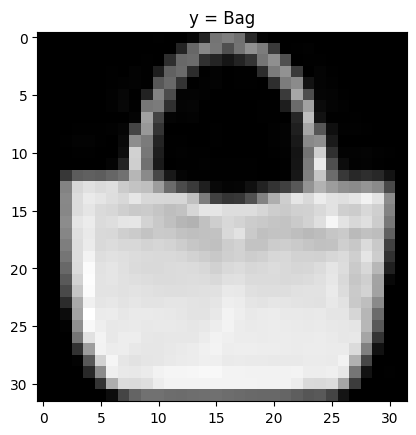

In [ ]:
show_data(train_dataset[100])

Build a Convolutional Neural Network Class

In [ ]:
# in Pytorch torch, the network architecture should be firstly defiine as a python class inherited from the nn.Module super class
# for the object oriented programming syntax of python, refer to the python coding tutorial notebook
class CNN(nn.Module):
    
    # Constructor - in the constructor, we only define network architector, NOT behavior, all behaviors are left to the forward method
    def __init__(self):
        super(CNN, self).__init__() # call the super / parent class thus instantiate self 
        # set up the CNN based on the module format, a single module = 2D conv + Batch Normalization + Drop out + ReLU activation + Max Pooling
        self.module1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same'), # 'same' means the output width and height unchange, the empty pixels are padded by zero
            nn.BatchNorm2d(32),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            ) # 16*16*32
        
        self.module2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            nn.BatchNorm2d(64),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            ) # 8*8*64
        
        self.module3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same'),
            nn.BatchNorm2d(128),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            ) # 4*4*128

        self.flat = nn.Flatten()  # reduce N-dimension tensor to a 1-D vector
        self.fc1 = nn.Linear(in_features=4*4*128, out_features=4*4*128)
        self.drop = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(in_features=4*4*128, out_features=1024)
        self.fc3 = nn.Linear(in_features=1024, out_features=10)
    
    # Prediction - the forward method is mandatory, it defines how the data being passed through the network architecture 
    def forward(self, x):
        x = self.module1(x)
        x = self.module2(x)
        x = self.module3(x)
        x = self.flat(x)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [ ]:
model = CNN()

In [ ]:
print(model)

CNN(
  (module1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.2, inplace=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (module2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.2, inplace=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (module3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.2, inplace=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (f

In [ ]:
print(f'data in training set: {len(train_dataset)}')
print(f'data in validation set: {len(validation_dataset)}')

data in training set: 60000
data in validation set: 10000


In [ ]:
criterion = nn.CrossEntropyLoss(reduction="sum")
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=200)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1000)

In [ ]:
from sklearn.utils import validation

best_model = None
n_epochs = 40
model.to(device) # load the network model to device (GPU/CPU)
best_model = None # update the model only when the training has improvements 
best_loss = np.inf
N_test = len(validation_dataset)
loss_list = []
epoch_loss = []
epoch_acc = []
epoch_val_loss = []

Define the training iteration

In [ ]:
for epoch in range(n_epochs):
  model.train() # set the model to the train mode, it is already on device
  # all involved tensors for a particular operation must be on the same device, cpu / gpu
  # you can use .to(device) where the device is set to torch.device('cpu') / torch.device('cuda') / [torch.device('cuda:0') , torch.device('cuda:1')] - multi-GPU setting
  # or use torch.tensor.cuda() / torch.tensor.cpu() to move the tensor between the CPU and GPU memory
  # I show you both ways in the code below
  for X_batch, y_batch in train_loader:
    y_pred = model(X_batch.to(device)) # y_pred is on device since it is computed on device
    loss = criterion(y_pred, y_batch.to(device)) # both y_pred and y_batch should be on device
    optimizer.zero_grad() # clean the old gradients for the upcoming update
    loss.backward() # get the gradients based on errors
    optimizer.step() # update the weights in the model
    loss_list.append(loss.item()) # get the loss value by callin .item() down to CPU
  epoch_loss.append(np.sum(loss_list))
  loss_list = []
  
  # validation
  correct = 0
  val_loss = 0
  model.eval() # set the model to evaluation mode
  with torch.no_grad(): # stop recording the gradients
    for X_batch, y_batch in validation_loader:
      y_pred = model(X_batch.cuda())
      val_loss += criterion(y_pred, y_batch.to(device))
      _, yhat = torch.max(y_pred,1) # compare to tensorflow, tensorflow uses tf.math.argmax() to get the predicted index
      correct += (yhat == y_batch.to(device)).sum().item()
    if val_loss < best_loss: # if the validation loss reduces, we update the model
      best_loss = val_loss
      best_model = model.state_dict()


    epoch_val_loss.append(val_loss.item())
    accuracy = correct / N_test
    epoch_acc.append(accuracy)
  
  print("Epoch {0:3d} -- loss: {1:.4f} -- val loss: {2:.4f} -- val acc: {3:.4f}".format(epoch, epoch_loss[epoch], epoch_val_loss[epoch], epoch_acc[epoch]))

torch.save(best_model, "FMNIST.pth")

Epoch   0 -- loss: 49322.9230 -- val loss: 4795.7705 -- val acc: 0.8279
Epoch   1 -- loss: 21825.6190 -- val loss: 3736.2285 -- val acc: 0.8718
Epoch   2 -- loss: 19431.4157 -- val loss: 3801.3838 -- val acc: 0.8672
Epoch   3 -- loss: 18058.8116 -- val loss: 3366.5286 -- val acc: 0.8800
Epoch   4 -- loss: 17477.0773 -- val loss: 3332.9041 -- val acc: 0.8859
Epoch   5 -- loss: 15850.4379 -- val loss: 3600.5718 -- val acc: 0.8691
Epoch   6 -- loss: 15444.3491 -- val loss: 2983.7866 -- val acc: 0.8954
Epoch   7 -- loss: 14326.3619 -- val loss: 3129.8821 -- val acc: 0.8905
Epoch   8 -- loss: 13721.1396 -- val loss: 3312.8560 -- val acc: 0.8839
Epoch   9 -- loss: 13246.9167 -- val loss: 3019.4038 -- val acc: 0.8919
Epoch  10 -- loss: 12713.7209 -- val loss: 3512.8506 -- val acc: 0.8776
Epoch  11 -- loss: 12107.6929 -- val loss: 3533.0740 -- val acc: 0.8775
Epoch  12 -- loss: 11824.7345 -- val loss: 3070.5237 -- val acc: 0.8884
Epoch  13 -- loss: 11411.2802 -- val loss: 2859.0273 -- val acc:

Text(0.5, 0, 'epoch')

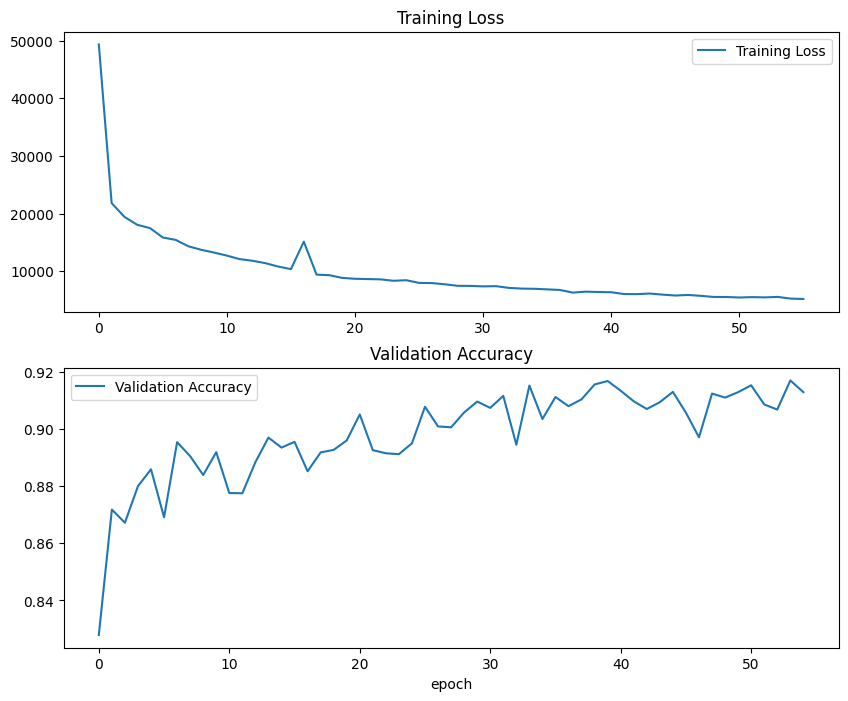

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(epoch_loss, label='Training Loss')
plt.legend(loc='best')
plt.title('Training Loss')

plt.subplot(2, 1, 2)
plt.plot(epoch_acc, label='Validation Accuracy')
plt.plot()
plt.legend(loc='best')
plt.title('Validation Accuracy')
plt.xlabel('epoch')

load the best model: 1-load the dicts from file, 2-load the parameters to the object 

In [ ]:
best_model = torch.load("FMNIST.pth")
model.load_state_dict(best_model)

<All keys matched successfully>

In [ ]:
correct = 0
N_test = 10000

for x_test, y_test in validation_loader:
  x_test, y_test = x_test.to(device), y_test.to(device)
  z = model(x_test)
  _, yhat = torch.max(z.data,1)
  correct += (yhat == y_test).sum().item()
  accuracy = correct / N_test

print(f'Trained Model accuracy: {accuracy}')

Trained Model accuracy: 0.9129
